In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices, dmatrix
import statsmodels.api as sm

%matplotlib inline


In [2]:
# load the data
df = pd.read_csv('../data/cars93.csv')


In [3]:
cols_obj = df.columns[df.dtypes == object]

In [4]:
df[cols_obj]

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
5,Buick,Century,Midsize,Driver only,Front,4,No,USA,Buick Century
6,Buick,LeSabre,Large,Driver only,Front,6,No,USA,Buick LeSabre
7,Buick,Roadmaster,Large,Driver only,Rear,6,No,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,Driver only,Front,6,No,USA,Buick Riviera
9,Cadillac,DeVille,Large,Driver only,Front,8,No,USA,Cadillac DeVille


In [5]:
df.columns = [col.replace('.','') for col in df.columns]

In [6]:
df.columns

Index([u'Manufacturer', u'Model', u'Type', u'MinPrice', u'Price', u'MaxPrice', u'MPGcity', u'MPGhighway', u'AirBags', u'DriveTrain', u'Cylinders', u'EngineSize', u'Horsepower', u'RPM', u'Revpermile', u'Mantransavail', u'Fueltankcapacity', u'Passengers', u'Length', u'Wheelbase', u'Width', u'Turncircle', u'Rearseatroom', u'Luggageroom', u'Weight', u'Origin', u'Make'], dtype='object')

In [7]:
df.Cylinders = df.Cylinders.astype(int)

ValueError: invalid literal for long() with base 10: 'rotary'

In [8]:
df.loc[df.Cylinders == 'rotary', 'Cylinders'] = 0

In [9]:
df.Cylinders = df.Cylinders.astype(int)
df.Cylinders.dtype

dtype('int64')

In [10]:
# check missing values

cols_with_null = []

for col in df.columns:
    for row in range(len(df.index)):
        if pd.isnull(df[col][row]):
            print 'missing value: col = ' + col + ', row = ' + str(row)
            if col not in cols_with_null:
                cols_with_null.append(col)

missing value: col = Rearseatroom, row = 18
missing value: col = Rearseatroom, row = 56
missing value: col = Luggageroom, row = 15
missing value: col = Luggageroom, row = 16
missing value: col = Luggageroom, row = 18
missing value: col = Luggageroom, row = 25
missing value: col = Luggageroom, row = 35
missing value: col = Luggageroom, row = 55
missing value: col = Luggageroom, row = 56
missing value: col = Luggageroom, row = 65
missing value: col = Luggageroom, row = 69
missing value: col = Luggageroom, row = 86
missing value: col = Luggageroom, row = 88


In [11]:
cols_with_null

['Rearseatroom', 'Luggageroom']

In [12]:
df[df['Rearseatroom'].isnull()]

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
18,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,Rear,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
56,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


In [13]:
df[['Type','Rearseatroom']][df['Type']=='Sporty']

,Type,Rearseatroom
13,Sporty,25.0
18,Sporty,NaN
27,Sporty,20.0
33,Sporty,24.0
34,Sporty,23.0
39,Sporty,24.5
40,Sporty,23.5
45,Sporty,23.5
56,Sporty,NaN
59,Sporty,19.0


In [14]:
df.sort('Rearseatroom')[['Manufacturer', 'Model', 'Type', 'Rearseatroom']]

,Manufacturer,Model,Type,Rearseatroom
59,Mercury,Capri,Sporty,19.0
27,Dodge,Stealth,Sporty,20.0
34,Ford,Probe,Sporty,23.0
84,Toyota,Celica,Sporty,23.0
79,Subaru,Justy,Small,23.5
40,Honda,Prelude,Sporty,23.5
45,Hyundai,Scoupe,Sporty,23.5
83,Toyota,Tercel,Small,24.0
33,Ford,Mustang,Sporty,24.0
39,Geo,Storm,Sporty,24.5


In [15]:
crit = df['Rearseatroom'].isnull()

In [16]:
df.loc[crit, 'Rearseatroom'] = 0

In [17]:
df.loc[crit, 'Rearseatroom']

18    0
56    0
Name: Rearseatroom, dtype: float64

In [18]:
crit = df['Luggageroom'].isnull()

In [19]:
df.loc[crit]

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
15,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
16,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,4WD,...,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
18,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,Rear,...,2,179,96,74,43,0.0,NaN,3380,USA,Chevrolet Corvette
25,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,4WD,...,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
35,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,4WD,...,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
55,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,4WD,...,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
56,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,0.0,NaN,2895,non-USA,Mazda RX-7
65,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,Front,...,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
69,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,Front,...,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
86,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,4WD,...,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


In [20]:
df.loc[crit,'Luggageroom'] = 0

In [21]:
df.loc[crit,'Luggageroom']

15    0
16    0
18    0
25    0
35    0
55    0
56    0
65    0
69    0
86    0
88    0
Name: Luggageroom, dtype: float64

In [22]:
# check if there is still missing value; if yes, it prints a line for which col and which row it is
cols_with_null = []

for col in df.columns:
    for row in range(len(df.index)):
        if pd.isnull(df[col][row]):
            print 'missing value: col = ' + col + ', row = ' + str(row)
            if col not in cols_with_null:
                cols_with_null.append(col)

In [23]:
y = df['MPGcity']
selectedFeatures = df._get_numeric_data().columns.tolist()
selectedFeatures.remove('MPGcity')
selectedFeatures.remove('MPGhighway')
X = df[selectedFeatures]
X.head()

,MinPrice,Price,MaxPrice,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight
0,12.9,15.9,18.8,4,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11,2705
1,29.2,33.9,38.7,6,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15,3560
2,25.9,29.1,32.3,6,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14,3375
3,30.8,37.7,44.6,6,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17,3405
4,23.7,30.0,36.2,4,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13,3640


In [24]:
from sklearn import feature_selection as fs

def f_regression_feature_selection(input, response):
    return fs.univariate_selection.f_regression(input, response)
    

In [25]:
f_regression_feature_selection(X, y)

(array([  57.68644782,   49.75883435,   39.01797676,   50.81660327,
          92.50640019,   75.19164813,   13.81477199,   85.43076684,
         177.59808793,   19.13866436,   72.63211556,   72.97359956,
          98.25600902,   72.69089886,    1.09318377,    0.26322564,
         223.75104404]),
 array([  2.61683485e-11,   3.30830168e-10,   1.32291140e-08,
          2.33822606e-10,   1.60597258e-15,   1.53683958e-13,
          3.48130122e-04,   9.79750748e-15,   4.17732014e-23,
          3.23162270e-05,   3.14261248e-13,   2.85466862e-13,
          3.89018214e-16,   3.09100806e-13,   2.98536231e-01,
          6.09155989e-01,   2.96704833e-26]))

In [26]:
f_regression_feature_selection(X, y)[0]

array([  57.68644782,   49.75883435,   39.01797676,   50.81660327,
         92.50640019,   75.19164813,   13.81477199,   85.43076684,
        177.59808793,   19.13866436,   72.63211556,   72.97359956,
         98.25600902,   72.69089886,    1.09318377,    0.26322564,
        223.75104404])

In [27]:
selectF = f_regression_feature_selection(X, y)[0] < 10
X.columns[selectF]

Index([u'Rearseatroom', u'Luggageroom'], dtype='object')

--> drop the 2 columns with F values smaller than 10

In [28]:
selectedFeatures.remove('Rearseatroom')
selectedFeatures.remove('Luggageroom')
selectedFeatures

['MinPrice',
 'Price',
 'MaxPrice',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Weight']

In [29]:
Xs = X[selectedFeatures]

In [30]:
Xs.columns

Index([u'MinPrice', u'Price', u'MaxPrice', u'Cylinders', u'EngineSize', u'Horsepower', u'RPM', u'Revpermile', u'Fueltankcapacity', u'Passengers', u'Length', u'Wheelbase', u'Width', u'Turncircle', u'Weight'], dtype='object')

In [31]:
Ps = f_regression_feature_selection(Xs, y)[1]
Ps

array([  2.61683485e-11,   3.30830168e-10,   1.32291140e-08,
         2.33822606e-10,   1.60597258e-15,   1.53683958e-13,
         3.48130122e-04,   9.79750748e-15,   4.17732014e-23,
         3.23162270e-05,   3.14261248e-13,   2.85466862e-13,
         3.89018214e-16,   3.09100806e-13,   2.96704833e-26])

In [32]:
pValues = zip(Xs.columns, Ps)

In [33]:
pValues

[('MinPrice', 2.6168348463105278e-11),
 ('Price', 3.3083016774761084e-10),
 ('MaxPrice', 1.3229113958756686e-08),
 ('Cylinders', 2.3382260597173265e-10),
 ('EngineSize', 1.6059725847409354e-15),
 ('Horsepower', 1.5368395790527695e-13),
 ('RPM', 0.00034813012242378827),
 ('Revpermile', 9.7975074836456392e-15),
 ('Fueltankcapacity', 4.1773201363738332e-23),
 ('Passengers', 3.2316226989500621e-05),
 ('Length', 3.1426124845759561e-13),
 ('Wheelbase', 2.8546686246273497e-13),
 ('Width', 3.8901821377486833e-16),
 ('Turncircle', 3.0910080602983453e-13),
 ('Weight', 2.9670483343733127e-26)]

In [34]:
pValuesRanked = sorted(pValues, key = lambda x: x[1])
pValuesRanked

[('Weight', 2.9670483343733127e-26),
 ('Fueltankcapacity', 4.1773201363738332e-23),
 ('Width', 3.8901821377486833e-16),
 ('EngineSize', 1.6059725847409354e-15),
 ('Revpermile', 9.7975074836456392e-15),
 ('Horsepower', 1.5368395790527695e-13),
 ('Wheelbase', 2.8546686246273497e-13),
 ('Turncircle', 3.0910080602983453e-13),
 ('Length', 3.1426124845759561e-13),
 ('MinPrice', 2.6168348463105278e-11),
 ('Cylinders', 2.3382260597173265e-10),
 ('Price', 3.3083016774761084e-10),
 ('MaxPrice', 1.3229113958756686e-08),
 ('Passengers', 3.2316226989500621e-05),
 ('RPM', 0.00034813012242378827)]

In [35]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 15 columns):
MinPrice            93 non-null float64
Price               93 non-null float64
MaxPrice            93 non-null float64
Cylinders           93 non-null int64
EngineSize          93 non-null float64
Horsepower          93 non-null int64
RPM                 93 non-null int64
Revpermile          93 non-null int64
Fueltankcapacity    93 non-null float64
Passengers          93 non-null int64
Length              93 non-null int64
Wheelbase           93 non-null int64
Width               93 non-null int64
Turncircle          93 non-null int64
Weight              93 non-null int64
dtypes: float64(5), int64(10)
memory usage: 11.6 KB


In [36]:
# build univariate models by each features, and see each of their R^2

from sklearn.linear_model import Ridge

In [40]:
scores = []

for col, p in pValuesRanked:
    est = Ridge()
    X = [[x] for x in Xs[col]]
    est.fit(X, y)
    scores.append(est.score(X, y))

# list all the R^2, sorted in p values ascending
scores


[0.71088261111818518,
 0.66120316879185925,
 0.51916952435332053,
 0.50405408231409909,
 0.48421694453645348,
 0.45243939135018441,
 0.44503258921927358,
 0.44407367770188377,
 0.44387445046981788,
 0.38797380328491071,
 0.35831516975314959,
 0.35350416124938977,
 0.30009678217269165,
 0.17375153844760116,
 0.13180176543521815]

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


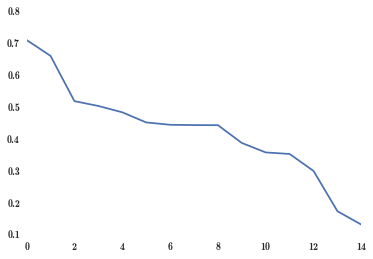

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(len(scores)), scores)

In [55]:
# build multivariates models, with features add up one by one, in the ascending order of p-values

scores = []
features = []

for col, score in pValuesRanked:
    est = Ridge()
    features.append(col)
    
    if len(features) == 1:
        X = [[x] for x in Xs[col]]
    else:
        X = Xs[features]
    
    est.fit(X, y)
    scores.append(est.score(X, y))
    

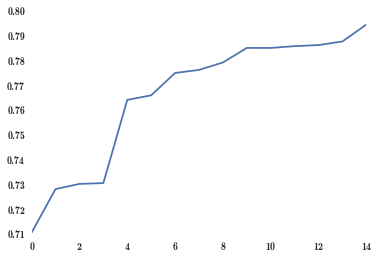

In [58]:
plt.plot(range(len(scores)), scores)

In [78]:
zip(features, scores)

[('Weight', 0.71088261111818518),
 ('Fueltankcapacity', 0.7284379673511624),
 ('Width', 0.73052470894983745),
 ('EngineSize', 0.73085177908265198),
 ('Revpermile', 0.7643949562316773),
 ('Horsepower', 0.76625017932651573),
 ('Wheelbase', 0.77525675394008253),
 ('Turncircle', 0.77649103842293843),
 ('Length', 0.77948596113982949),
 ('MinPrice', 0.78536255102541885),
 ('Cylinders', 0.78533957530290999),
 ('Price', 0.78607282857113536),
 ('MaxPrice', 0.78650886394878849),
 ('Passengers', 0.7879714121206447),
 ('RPM', 0.79478644061368775)]

--> the first feature is important, but 2nd and 3rd does not show much lift in R^2 after adding
--> suspect that the first 3 features are highly multicollinear


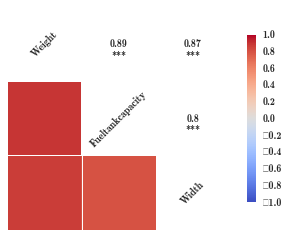

In [79]:
sns.corrplot(Xs[['Weight', 'Fueltankcapacity', 'Width']])

--> the 3 features are highly correlated - in order to confirm these 3 are "relatively" highly correlated, let's also compare the correlations of other features with one another

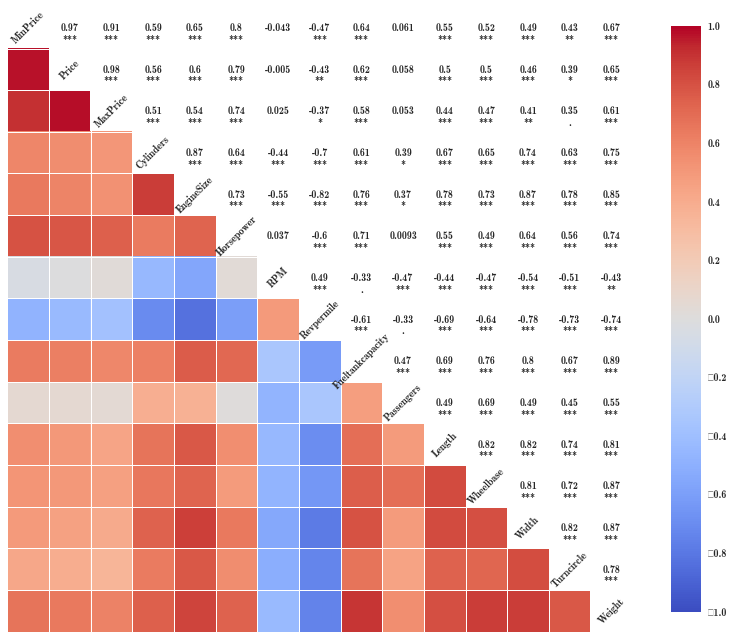

In [80]:
f, ax = plt.subplots(figsize=(14, 14))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(Xs, ax=ax)
# f.tight_layout()

--> the 3 features are relatively highly correlated
--> also note that engine size [3] and Revpermile [4] is relatively highly correlated
--> among the top 6 features, we can take away [1], [2], [4]
--> i.e. handpick [0, 3, 5] as key features

In [90]:
# RFE

from sklearn.feature_selection import RFE

# create RFE object and rank features
est = Ridge()
rfe = RFE(estimator = est, n_features_to_select=1, step=1)

# standardize the data
Xs_std = (Xs - Xs.mean())/ Xs.std()

# model fitting
rfe.fit(Xs_std, y)
ranking = rfe.ranking_

# create feature-ranking tuples
scores = zip(Xs.columns, ranking)
scores

[('MinPrice', 6),
 ('Price', 14),
 ('MaxPrice', 13),
 ('Cylinders', 15),
 ('EngineSize', 5),
 ('Horsepower', 10),
 ('RPM', 7),
 ('Revpermile', 4),
 ('Fueltankcapacity', 2),
 ('Passengers', 11),
 ('Length', 9),
 ('Wheelbase', 3),
 ('Width', 8),
 ('Turncircle', 12),
 ('Weight', 1)]

In [93]:
scores = sorted(scores, key = lambda x: x[1])
scores

[('Weight', 1),
 ('Fueltankcapacity', 2),
 ('Wheelbase', 3),
 ('Revpermile', 4),
 ('EngineSize', 5),
 ('MinPrice', 6),
 ('RPM', 7),
 ('Width', 8),
 ('Length', 9),
 ('Horsepower', 10),
 ('Passengers', 11),
 ('Turncircle', 12),
 ('MaxPrice', 13),
 ('Price', 14),
 ('Cylinders', 15)]

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


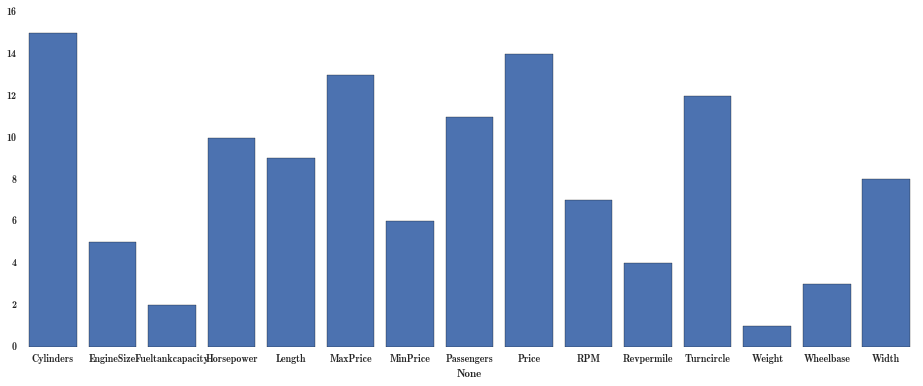

In [106]:
# plot the features by rank (from RFE)
rfe_features = [x[0] for x in scores]
ranks = [x[1] for x in scores]

plt.figure(figsize=(16,6))
sns.barplot(Xs.columns, ranking)


In [111]:
rfe_features = rfe_features[:5]
rfe_features
p_features = [x[0] for x in pValuesRanked][:5]
p_features

# handpicked by manually examine R^2 contribution and features correlation
handpicked_features = ['Weight', 'Fueltankcapacity', 'Width']
handpicked_features

['Weight', 'Fueltankcapacity', 'Width']

In [112]:
for f in [handpicked_features, p_features, rfe_features]:
    est = Ridge()
    X = Xs[f]
    est.fit(X,y)
    print est.score(X,y)

0.73052470895
0.764394956232
0.771719470316


--> RFE features selection deliver the strongest model

In [115]:
# Polynominal features consideration
# explore with rfe_features

In [116]:
rfe_features

['Weight', 'Fueltankcapacity', 'Wheelbase', 'Revpermile', 'EngineSize']

Object `Poly` not found.
